# Distribución de Cúmulos Globulares (CG) y Cúmulos Abiertos (CA) de Gaia EDR3 en el Cielo Nocturno.

>Existen dos tipos de cúmulos estelares: los cúmulos abiertos (CCA) y los cúmulos globulares (CG). A la hora de estudiar su distribución dentro de nuestra galaxia, es importante visualizar su distribución en el cielo nocturno. Se recomienda el uso de los últimos datos de Gaia EDR3.

In [1]:
#Importar librerías:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from astroquery.vizier import Vizier
from astropy.table import Table
Vizier.ROW_LIMIT = -1

## Descargar de CAN+20, el catálogo de posiciones y Cúmulos Abiertos (Open Clusters)

En primer lugar, necesitamos el catálogo de OC [Portrait Galactic disc :J/A+A/640/A1](https://vizier.cfa.harvard.edu/viz-bin/VizieR? source=J/A+A/640/A1) que es el resultado del artículo [Painting a portrait of the Galactic disc with its stellar clusters (https://www.aanda.org/articles/aa/pdf/2020/08/aa38192-20.pdf). 



- Utilizando el método "get_catalogs" de la clase Vizier para descargar un catálogo específico desde la base de datos Vizier. El argumento catalog="J/A+A/640/A1" especifica el identificador único del catálogo que deseamos consultar.

En este caso, corresponde a un catálogo publicado en la revista Astronomy & Astrophysics (volumen 640, artículo A1).

In [2]:
query = Vizier.get_catalogs(catalog="J/A+A/640/A1")
print(query)

TableList with 2 tables:
	'0:J/A+A/640/A1/table1' with 20 column(s) and 2017 row(s) 
	'1:J/A+A/640/A1/nodup' with 16 column(s) and 234128 row(s) 


- Como podemos ver, hay dos conjuntos de datos, uno para los datos de cada OC, el otro para los miembros de cada OC. Sólo necesitamos el primer conjunto de datos. 

- El plan es crear objetos `DataFram` a partir de los catálogos descargados utilizando `pandas`.

- Pero primero, tenemos que crear una ruta de archivo en el que vamos a guardar nuestros dataframes de salida.

In [3]:
import os

In [5]:
os.makedirs('Data//Output//Fig1//df', exist_ok=True)
os.makedirs('Data//Output//Fig1//img', exist_ok=True)

- La línea import os importa el módulo os de Python, que proporciona funciones para interactuar con el sistema operativo. Este módulo es útil para realizar tareas relacionadas con la gestión de archivos, directorios y otras operaciones del sistema. Este módulo es ampliamente utilizado para crear scripts automatizados, trabajar con estructuras de archivos y realizar operaciones específicas del sistema operativo.

- os.makedirs('Data//Output//Fig1//df', exist_ok=True)

>Crea el directorio Data/Output/Fig1/df.
Si alguno de los directorios intermedios (Data, Output, Fig1) no existe, también los crea de manera recursiva.
Si el directorio ya existe, no genera errores y simplemente pasa.

- os.makedirs('Data//Output//Fig1//img', exist_ok=True)

>Hace lo mismo que la línea anterior, pero crea el directorio Data/Output/Fig1/img junto con los intermedios si no existen.
El código asegura que las carpetas requeridas existen antes de usarlas, evitando errores en el flujo del programa.



### Descargar "tabla1", el Catálogo de Clusters:

- Usando el módulo `Vizier` de `astroquery`, descargaremos la `tabla1` y la guardaremos como `DataFrame` de `pandas`.
- Sólo necesitamos las columnas para cada nombre de OC, las coordenadas tanto en ascensión recta como en declinación $(\alpha, \delta)$ y sus correspondientes coordenadas galácticas $(l,b)$.

In [6]:
table1_cols = ['Cluster', 
               'RA_ICRS', 'DE_ICRS', 
               'GLON', 'GLAT']
table1 = Vizier(columns=table1_cols, catalog='J/A+A/640/A1/table1', row_limit=-1).query_constraints()
table1_df = table1[0].to_pandas()
table1_df.to_csv('Data//Output//Fig1//df//CA+20_table1_df.csv', index=False)
table1_df

,Cluster,RA_ICRS,DE_ICRS,GLON,GLAT
0,ASCC_10,51.869999,34.980999,155.723007,-17.770
1,ASCC_101,288.398987,36.368999,68.028000,11.608
2,ASCC_105,295.548004,27.365999,62.825001,2.063
3,ASCC_107,297.164001,21.987000,58.903999,-1.901
4,ASCC_108,298.306000,39.348999,74.377998,6.074
...,...,...,...,...,...
2012,vdBergh_1,99.275002,3.078000,208.556000,-1.781
2013,vdBergh_80,97.738998,-9.625000,219.246994,-8.891
2014,vdBergh_83,100.025002,-27.188999,236.447998,-14.329
2015,vdBergh_85,101.718002,1.320000,211.237000,-0.414


- Vamos a utilizar `astropy` para convertir los OCs en objetos `SkyCoord`, especificando que el marco de referencia es galáctico y el equinoccio es J2015.5 (la época utilizada en Gaia EDR3). 
- Crearemos `c_CA20` que contendrá todos los OCs de CA+20 como objetos `SkyCoord`.

In [7]:
from astropy import units as u
from astropy.coordinates import SkyCoord

- from astropy import units as u

>Importa el submódulo units de Astropy, asignándole el alias u.
 Este submódulo permite trabajar con unidades físicas y astronómicas de forma sencilla, como metros (u.m), segundos (u.s), años luz (u.ly), o grados (u.deg).
 También permite realizar conversiones entre unidades y asegura que las operaciones con magnitudes físicas sean consistentes.

- from astropy.coordinates import SkyCoord

>Importa la clase SkyCoord, que facilita el manejo de coordenadas astronómicas en diferentes sistemas de referencia (como ecuatorial, galáctico, o eclíptico).
Permite convertir entre sistemas de coordenadas y realizar cálculos como distancias angulares o transformaciones entre unidades.

In [8]:
c_CA20 = SkyCoord(l = table1_df['GLON'].values*u.degree, 
                  b = table1_df['GLAT'].values*u.degree, 
                  frame = 'galactic', equinox="J2015.5") 

- El uso del objeto "c_CA20" nos permite trazar las posiciones angulares de los datos OC en un plano.
- Las coordenadas en coordenadas galácticas son nuestro principal interés, ya que queremos ver cómo están distribuidas en el marco de referencia de la Vía Láctea. 
- El sistema de coordenadas galácticas utiliza el Sol como origen con la longitud galáctica $l=0$ hacia el centro de la galaxia.

[Text(0.5, 0, 'Galactic Longitude $l(\\degree)$'),
 Text(0, 0.5, 'Galactic Latitude $b(\\degree)$')]

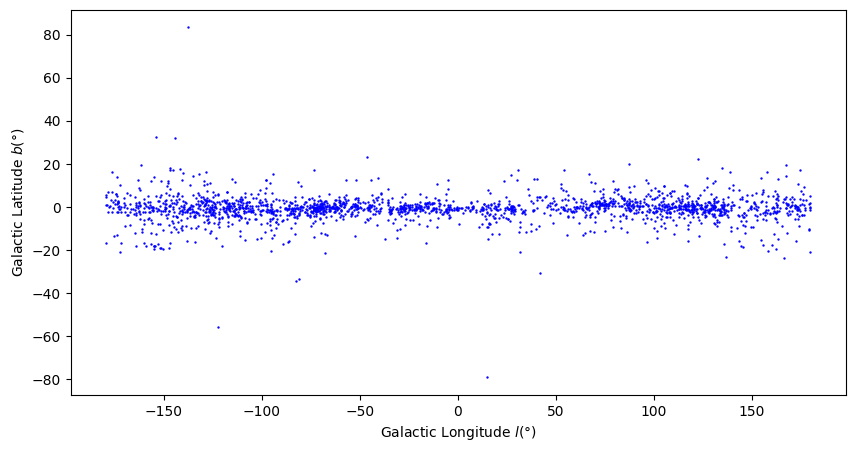

In [9]:
fig, ax = plt.subplots(figsize=(10,5), 
                      )

ax.scatter(c_CA20.l.wrap_at('180d'), 
           c_CA20.b, c='blue', s=0.5)

ax.set(xlabel=r'Galactic Longitude $l(\degree)$', 
       ylabel=r'Galactic Latitude $b(\degree)$')

## Descarga de Vasiliev21, el catálogo de posiciones de Cúmulos Globulares (OC)

- A continuación, nos interesa el catálogo de cúmulos globulares de Gaia EDR3 [Gaia EDR3 view on Galactic globular clusters : J/A+A/640/A1 (https://cdsarc.cds.unistra.fr/viz-bin/cat/J/MNRAS/505/5978) que es el resultado del artículo [Gaia EDR3 view on Galactic globular clusters (https://academic.oup.com/mnras/article/505/4/5978/6283730). 

In [10]:
query = Vizier.get_catalogs(catalog="J/MNRAS/505/5978")
print(query)

TableList with 1 tables:
	'0:J/MNRAS/505/5978/tablea1' with 14 column(s) and 170 row(s) 


- Sólo están disponibles las coordenadas $(\alpha, \delta)$. 

In [11]:
Vas21_cols = ['Name', 
              'RAJ2000', 'DEJ2000']
Vas21 = Vizier(columns=Vas21_cols, catalog='J/MNRAS/505/5978', row_limit=-1).query_constraints()
Vas21_df = Vas21[0].to_pandas()
Vas21_df.to_csv('Data//Output//Fig1//df//Vas21_table1_df.csv', index=False)
Vas21_df

,Name,RAJ2000,DEJ2000
0,NGC 104,6.024000,-72.081001
1,NGC 288,13.188000,-26.583000
2,NGC 362,15.809000,-70.848999
3,Whiting 1,30.737000,-3.253000
4,NGC 1261,48.068001,-55.216000
...,...,...,...
165,NGC 7089,323.363007,-0.823000
166,NGC 7099,325.092010,-23.180000
167,Pal 12,326.661987,-21.253000
168,Pal 13,346.684998,12.772000


Necesitamos el módulo `FK5` para convertir la época de coordenadas J2000 en J2015.5.

In [12]:
from astropy.coordinates import FK5

In [13]:
c_Vas21 = SkyCoord(ra = Vas21_df['RAJ2000'].values*u.degree, 
                   dec = Vas21_df['DEJ2000'].values*u.degree, 
                   frame = 'icrs', equinox="J2000").transform_to(FK5(equinox='J2015.5'))  

- Es fácil convertir a coordenadas galácticas. Basta con escribir "c_Vas21.l" y "c_Vas21.b" para acceder a las $(l,b)$ de los CG.

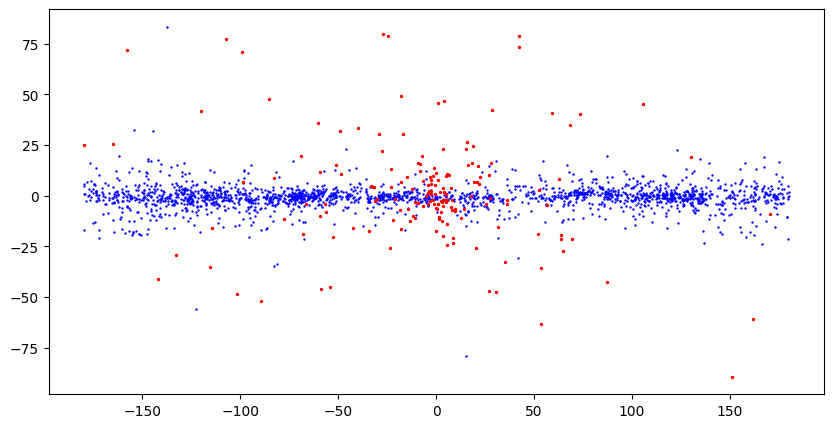

In [16]:
fig, ax = plt.subplots(figsize=(10,5), 
                       #subplot_kw={'projection':'mollweide'}
                      )

#ax.imshow(resultcolor, extent=[0,360,-90,90])
ax.scatter(c_CA20.l.wrap_at('180d'), c_CA20.b, c='blue', s=0.5)
ax.scatter(c_Vas21.galactic.l.wrap_at('180d'), c_Vas21.galactic.b, c='red', s=2)

Es más apropiado representar los cúmulos estelares en la proyección Mollweide.

[Text(0.5, 0, 'Galactic Longitude $l$'), Text(0, 0.5, 'Galactic Latitude $b$')]

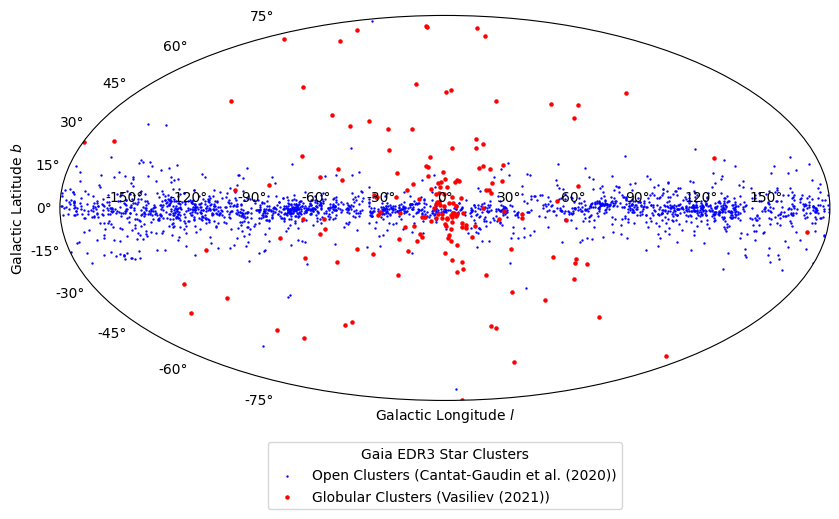

In [17]:
fig, ax = plt.subplots(figsize=(10,5), 
                       subplot_kw={'projection':'mollweide'}
                      )

ax.scatter(c_CA20.l.wrap_at('180d').radian, 
           c_CA20.b.radian, 
           c='blue', s=0.5, 
           label='Open Clusters (Cantat-Gaudin et al. (2020))')
ax.scatter(c_Vas21.galactic.l.wrap_at('180d').radian, 
           c_Vas21.galactic.b.radian, 
           c='red', s=5, 
           label='Globular Clusters (Vasiliev (2021))')

ax.legend(title='Gaia EDR3 Star Clusters', 
          loc='lower center', 
          bbox_to_anchor=(0.5, -0.3)
         )

ax.set(xlabel=r'Galactic Longitude $l$', 
       ylabel=r'Galactic Latitude $b$')

### Descargar el mapa del cielo de Gaia EDR3

![title](https://www.esa.int/var/esa/storage/images/esa_multimedia/images/2020/12/the_colour_of_the_sky_from_gaia_s_early_data_release_32/22358131-1-eng-GB/The_colour_of_the_sky_from_Gaia_s_Early_Data_Release_3_pillars.png)

- Puesto que queremos ver las distribuciones de OCs y GCs dentro del cielo nocturno, necesitamos tener la imagen de la Vía Láctea como imagen de fondo apropiada. 
- Afortunadamente, la extensión del sondeo Gaia EDR3 que fue cubierta está proporcionada por [A. Moitinho](https://www.esa.int/ESA_Multimedia/Images/2020/12/The_colour_of_the_sky_from_Gaia_s_Early_Data_Release_32)

In [18]:
import requests

In [19]:
img_url='https://www.esa.int/var/esa/storage/images/esa_multimedia/images/2020/12/the_colour_of_the_sky_from_gaia_s_early_data_release_32/22358131-1-eng-GB/The_colour_of_the_sky_from_Gaia_s_Early_Data_Release_3_pillars.png'

response = requests.get(img_url)
file = open("Data//Output//Fig1//img//edr3_skymap.png", "wb")
file.write(response.content)
file.close()

Posteriormente podemos cargar la imagen utilizando `imread` de `numpy`, con el objeto imagen leído denominado `edr3_skymap`.

[Text(0.5, 0, 'Galactic Longitude $l(\\degree)$'),
 Text(0, 0.5, 'Galactic Latitude $b(\\degree)$')]

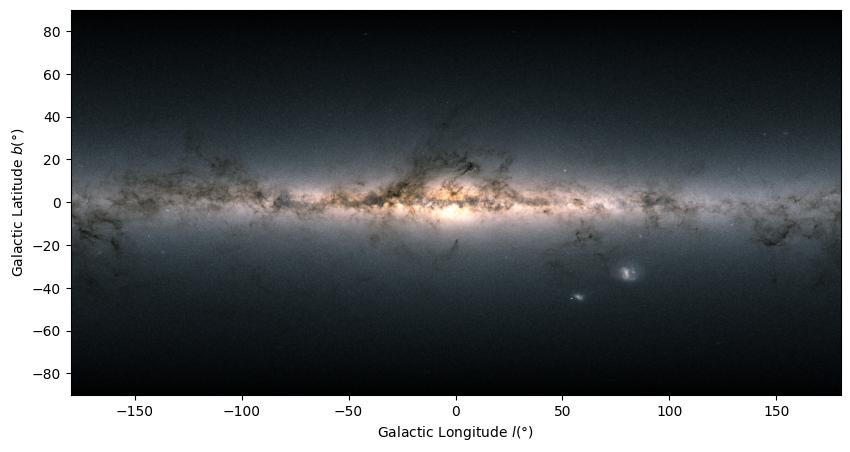

In [20]:
fig, ax = plt.subplots(figsize=(10,5), 
                       #subplot_kw={'projection':'mollweide'}
                      )

edr3_skymap = plt.imread("Data//Output//Fig1//img//edr3_skymap.png")

ax.imshow(edr3_skymap, extent=[-180,180,-90,90])


ax.set(xlabel=r'Galactic Longitude $l(\degree)$', 
       ylabel=r'Galactic Latitude $b(\degree)$')

La combinación de nuestros gráficos da como resultado la siguiente figura:

[Text(0.5, 0, 'Galactic Longitude $l(\\degree)$'),
 Text(0, 0.5, 'Galactic Latitude $b(\\degree)$')]

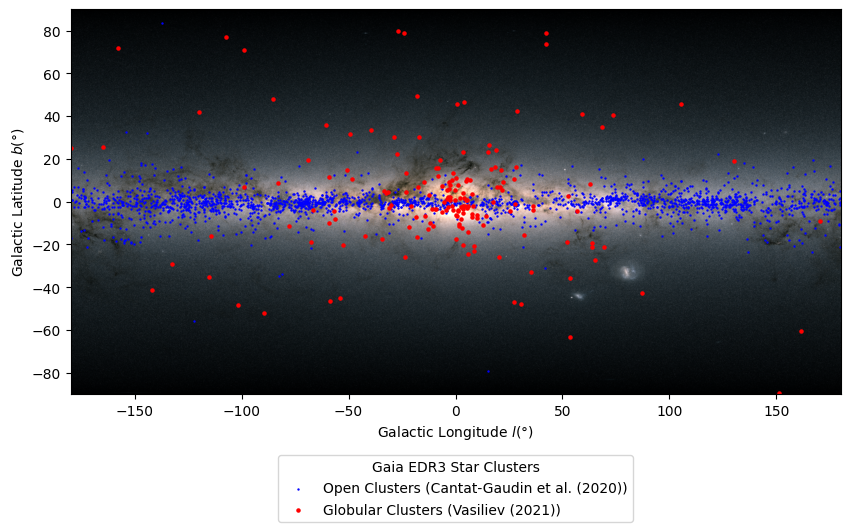

In [21]:
fig, ax = plt.subplots(figsize=(10,5), 
                       #subplot_kw={'projection':'mollweide'}
                      )

#ax.imshow(edr3_skymap, extent=[-180,180,-90,90])
ax.imshow(edr3_skymap, extent=[-180,180,-90,90])
ax.scatter(c_CA20.l.wrap_at('180d'), 
           c_CA20.b, 
           c='blue', s=0.5, 
           label='Open Clusters (Cantat-Gaudin et al. (2020))')
ax.scatter(c_Vas21.galactic.l.wrap_at('180d'), 
           c_Vas21.galactic.b, 
           c='red', s=5, 
           label='Globular Clusters (Vasiliev (2021))')

ax.legend(title='Gaia EDR3 Star Clusters', 
          loc='lower center', 
          bbox_to_anchor=(0.5, -0.35)
         )

ax.set(xlabel=r'Galactic Longitude $l(\degree)$', 
       ylabel=r'Galactic Latitude $b(\degree)$')

- Necesitamos crear una función `pcolormesh_projected` para proyectar cualquier matriz de imágenes `numpy` basada en cualquier proyección dada de `matplotlib`. 
- El código siguiente se basa en este `matplotlib` [issue (https://github.com/matplotlib/matplotlib/issues/12958).
- Tenga en cuenta que tenemos que invertir el eje y.

In [22]:
def pcolormesh_projected(img, projection=None, fig=None, ax=None):
    
    if (fig or ax ) is None:
        fig, ax = plt.subplots(subplot_kw={'projection':projection})
        
    lon = np.linspace(-np.pi,np.pi, img.shape[1])
    lat = np.linspace(np.pi/2,-np.pi/2, img.shape[0])
    LON, LAT = np.meshgrid(lon, lat)
    color_tuple = img.reshape((img.shape[0]*img.shape[1],img.shape[2]))

    ax.pcolormesh(LON, LAT, img[:, :, 0], 
                  color=color_tuple, shading='auto')

Aplicando `pcolormesh_projected` a `edr3_skymap`, tenemos:

[Text(0.5, 0, 'Galactic Longitude $l$'), Text(0, 0.5, 'Galactic Latitude $b$')]

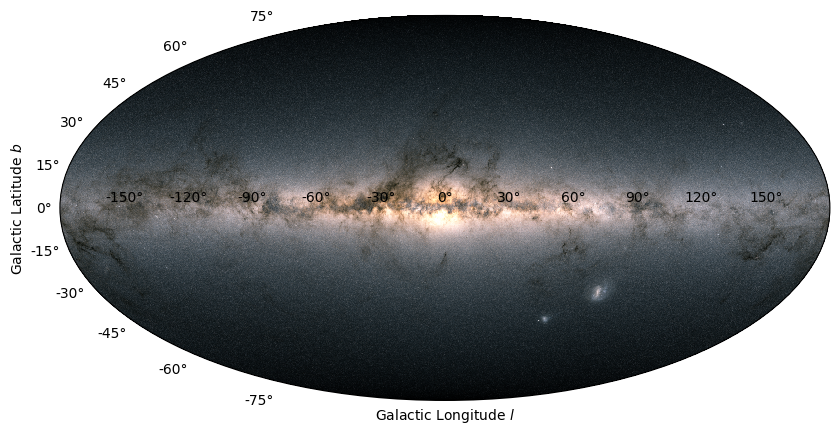

In [24]:
fig, ax = plt.subplots(figsize=(10,5), 
                       subplot_kw={'projection':'mollweide'}
                      )

pcolormesh_projected(edr3_skymap, 'mollweide', fig, ax)


ax.set(xlabel=r'Galactic Longitude $l$', 
       ylabel=r'Galactic Latitude $b$')

Resultado final:

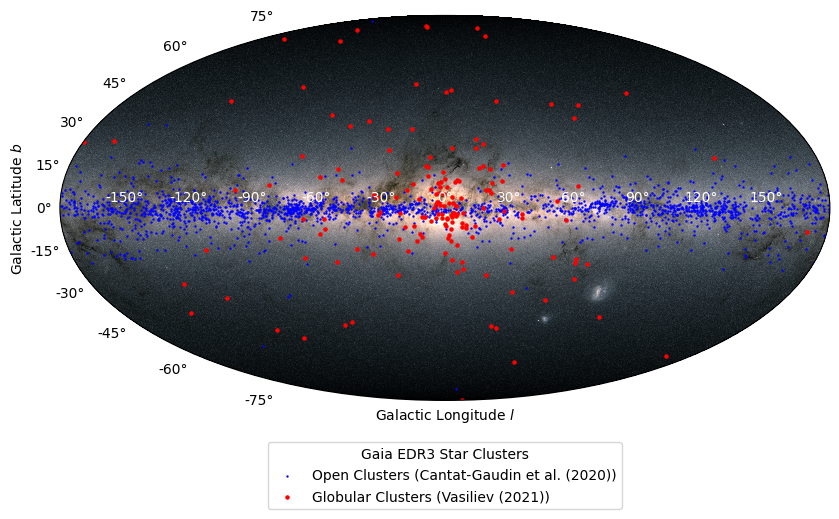

In [25]:
fig, ax = plt.subplots(figsize=(10,5), 
                       subplot_kw={'projection':'mollweide'}
                      )

pcolormesh_projected(edr3_skymap, 'mollweide', fig, ax)

ax.scatter(c_CA20.l.wrap_at('180d').radian, 
           c_CA20.b.radian, 
           c='blue', s=0.5, 
           label='Open Clusters (Cantat-Gaudin et al. (2020))')
ax.scatter(c_Vas21.galactic.l.wrap_at('180d').radian, 
           c_Vas21.galactic.b.radian, 
           c='red', s=5, 
           label='Globular Clusters (Vasiliev (2021))')

ax.legend(title='Gaia EDR3 Star Clusters', 
          loc='lower center', 
          bbox_to_anchor=(0.5, -0.3)
         )

ax.set(xlabel=r'Galactic Longitude $l$', 
       ylabel=r'Galactic Latitude $b$')
ax.tick_params(axis='x', colors='white')

In [26]:
fig.savefig('Gaia_EDR3_Star_Clusters.png', dpi=300, bbox_inches='tight')